# (Ford go bike trip data)
## by (Youssef El Khayat)

## Preliminary Wrangling

> The dataset we invesitgate today is information about cyclers including their age , distance, start station, trip times and alot more.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [5]:
from google.colab import files
uploaded = files.upload()

Saving 201902-fordgobike-tripdata.csv to 201902-fordgobike-tripdata.csv


In [2]:
df= pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()
# print(df['member_gender'].unique())

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [7]:
print(df.shape)
print(df.dtypes)
print(df.describe())

(183412, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object
        duration_sec  start_station_id  ...        bike_id  member_birth_year
count  183412.000000     183215.000000  ...  183412.000000      175147.000000
mean      726.078435        138.590427  ...    4472.906375        1984.806437
std      1794.389780        111.778864  ...    1664.383394          10.116689
min        61.000000          3.000000  ...      11.000000        1878.000000
25%       325.000000   

In [8]:
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [3]:
df['start_time'] = df['start_time'].astype('datetime64[ns]')
df['end_time'] = df['end_time'].astype('datetime64[ns]')
df['member_gender'] = df['member_gender'].astype('string')

In [4]:
df['member_gender']=df['member_gender'].fillna(df['member_gender'].mode()[0])
df['start_station_id']=df['start_station_id'].fillna(df['start_station_id'].mode()[0])
df['end_station_id']=df['end_station_id'].fillna(df['end_station_id'].mode()[0])
df['start_station_name']=df['start_station_name'].fillna(df['start_station_name'].mode()[0])
df['end_station_name']=df['end_station_name'].fillna(df['end_station_name'].mode()[0])

### What is the structure of your dataset?

> There are 183,412 records about cycling rides in the dataset with 10 features (duration in seconds,	start_time,	end_time,	start station id,	start station name,	start station latitude,	start station longitude,	end station id,	end station name,	end station latitude,	end station longitude,	bike id,	user type,member birth year,	member gender & bike share for all trip). Most variables are numeric in nature apart from other varriables like the gender and bike share all day.

### What is/are the main feature(s) of interest in your dataset?

> I want to investigate what features contribute to furtherest journey.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
gender, user type & strat station.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

Lets see the propotion for each gender in our dataset

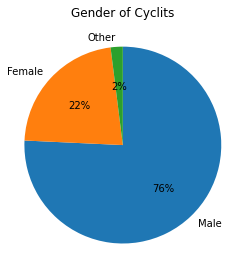

In [20]:
# creating genders pie chart
sorted_counts = df['member_gender'].value_counts();

plt.title('Gender of Cyclits',pad=20)
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False,  autopct='%1.0f%%');


plt.axis('square');

We can see that by far the majority of cyclists are males.

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

It's time to have a glimpse on the top most starting destinations for cycling trips.

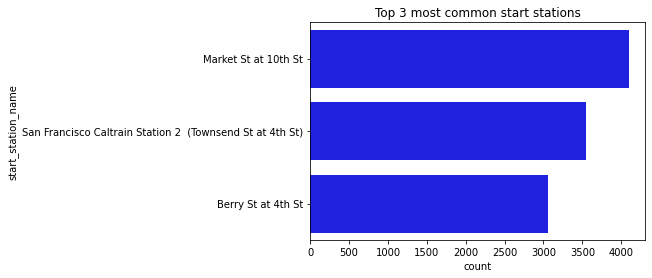

In [10]:
# creating Top 3 start stations plot
sb.countplot(data=df, y="start_station_name",  order=df.start_station_name.value_counts().iloc[:3].index,  color="blue").set_title("Top 3 most common start stations");

Our findings show that the top 3 cycling start stations are Market st at 10th st, San Francisco Caltrain Station & Berry St at 4th St.

### Calculate distance

Given the latituide and longituide of each trip lets calculate the distance covered for every trip.

In [11]:
def distance(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.    

    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

In [12]:
df['distance']= distance(df['start_station_latitude'],df['start_station_longitude'],df['end_station_latitude'],df['end_station_longitude'])

In [12]:
# plt.xlim(0,10)
# plt.hist(data = df, x = 'distance', bins=500);

Now let's investigate what are the cycling rush hours usually?

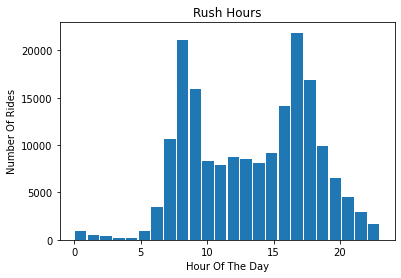

In [13]:
# creating histogram for number of riders per timing (hour)
data = df['start_time'].dt.hour
plt.hist(data,rwidth=.9, bins = 24)
plt.title('Rush Hours')
plt.xlabel('Hour Of The Day')
plt.ylabel('Number Of Rides');

It appears that the rush hours 8am in morning 17:00 it makes sense as these are the usual times people go to work or come from work.

we have to user types either subscribers or customers lets have a look on their distrubtions in our dataset.

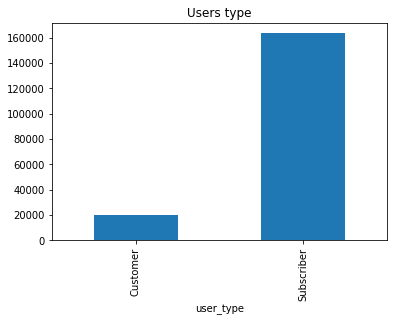

In [18]:
# creating barchart to demonstrate users types
df.groupby('user_type').user_type.count().plot(kind='bar');
plt.title('Users type');

It shows an absolute majority for subscribers than customers in our dataset.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The distrubtion shows that subscribers make a lot more trips than regular customers.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Just had to fill null values with the mode and correct some data types.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

Now lets obsereve the distance covered per gender.

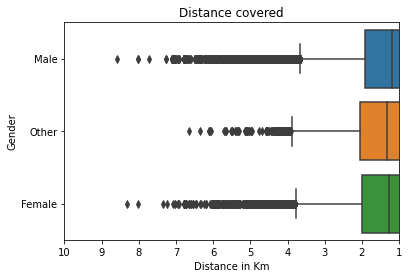

In [ ]:
# comparing distance covered across different genders
most_travelling = df['distance'] 
plt.xlim(10)
sb.boxplot(data =df , y='member_gender',x='distance')
plt.title('Distance covered')

plt.xlabel('Distance in Km')
plt.ylabel('Gender');

It looks like the others gender has the edge in the distance covered

Lets see distance covered per user type

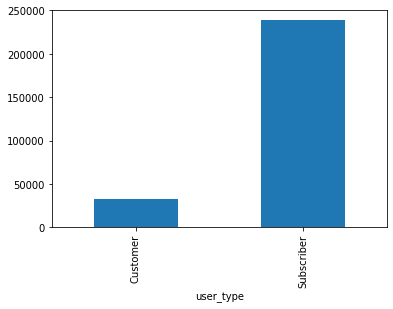

In [ ]:
df.groupby('user_type').distance.sum().plot(kind='bar', title="distance covered per user type");

Suscribers travel higher distances than customers.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> It seems that subscribers cover more distane.
### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> No we didint have any unexpected outcomes.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

Lets examine the distance covered given the gender and user type.

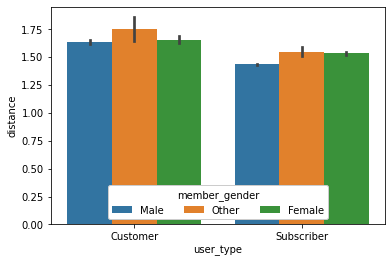

In [21]:
ax = sb.barplot(data = df, x = 'user_type', y = 'distance', hue = 'member_gender');
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'member_gender');

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> It shows that if you have an other gender subscriber your are more likely to have longer journey.

### Were there any interesting or surprising interactions between features?

> Yes it was surprising as others are minority gender in the dataset

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!